<a href="https://colab.research.google.com/github/di3po/colabNotes/blob/main/imageClassificationSoftmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.7.0


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


In [ ]:
predictions = model(x_train[:1]).numpy()
predictions


array([[ 0.4855205 ,  0.10064784, -0.27149943,  0.2644257 ,  0.14657344,
        -0.09793083,  1.189777  ,  0.6086729 , -0.45779175, -0.23809803]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()


array([[0.12122006, 0.08249477, 0.05685975, 0.09717494, 0.08637173,
        0.06763708, 0.2451485 , 0.13710679, 0.04719535, 0.05879102]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [ ]:
loss_fn(y_train[:1], predictions).numpy()


2.693599

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2904 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1404 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1043 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0856 - accuracy: 0.9741
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0733 - accuracy: 0.9764


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)


313/313 - 0s - loss: 0.0747 - accuracy: 0.9768 - 500ms/epoch - 2ms/step


[0.07465389370918274, 0.9768000245094299]

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
probability_model(x_test[:5])


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.6411736e-08, 1.1806823e-08, 4.1481458e-06, 4.5696625e-06,
        1.1298627e-11, 5.3180205e-08, 1.4215340e-12, 9.9998939e-01,
        3.7208569e-08, 1.7009367e-06],
       [1.6826897e-07, 6.6130749e-05, 9.9989784e-01, 3.3278549e-05,
        3.2776150e-14, 1.4050493e-06, 7.4288693e-08, 6.8807259e-13,
        1.1243343e-06, 2.6211506e-13],
       [4.9484321e-08, 9.9963343e-01, 2.2586317e-05, 1.2175512e-06,
        7.6974175e-05, 1.1826368e-05, 1.6781589e-05, 2.0192897e-04,
        3.4622659e-05, 5.1168922e-07],
       [9.9975222e-01, 1.4691894e-07, 2.1100060e-04, 2.2249534e-08,
        1.3299540e-07, 6.3167386e-07, 2.2296977e-05, 7.4454820e-06,
        2.6207698e-07, 5.8133701e-06],
       [6.2744430e-06, 8.1510535e-08, 6.1602768e-06, 4.2026164e-07,
        9.9471444e-01, 3.2023348e-08, 1.5898953e-05, 5.8978279e-05,
        7.7263900e-07, 5.1968745e-03]], dtype=float32)>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.7.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
train_images.shape


(60000, 28, 28)

In [ ]:
len(train_labels)


60000

In [ ]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape



(10000, 28, 28)

In [ ]:
len(test_labels)


10000

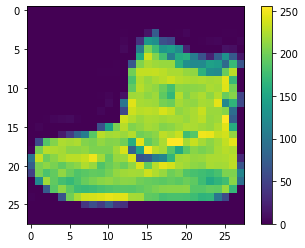

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

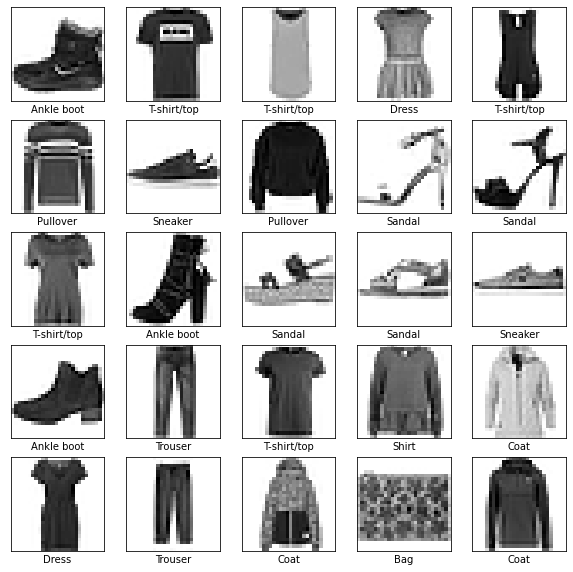

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4949 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3748 - accuracy: 0.8633
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3375 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3149 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2979 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2825 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2710 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2599 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2491 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.3250 - accuracy: 0.8887 - 546ms/epoch - 2ms/step

Test accuracy: 0.888700008392334


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [ ]:
predictions = probability_model.predict(test_images)


In [ ]:
predictions[0]


array([4.8920447e-07, 1.1174665e-09, 5.1719292e-07, 1.1064394e-10,
       4.5440917e-08, 3.2644377e-03, 4.7525964e-07, 2.7566242e-03,
       5.4390632e-08, 9.9397743e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])


9

In [ ]:
test_labels[0]


9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


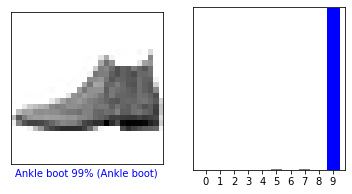

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


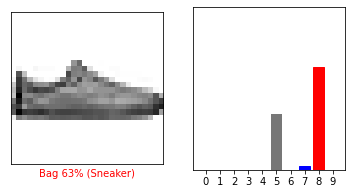

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


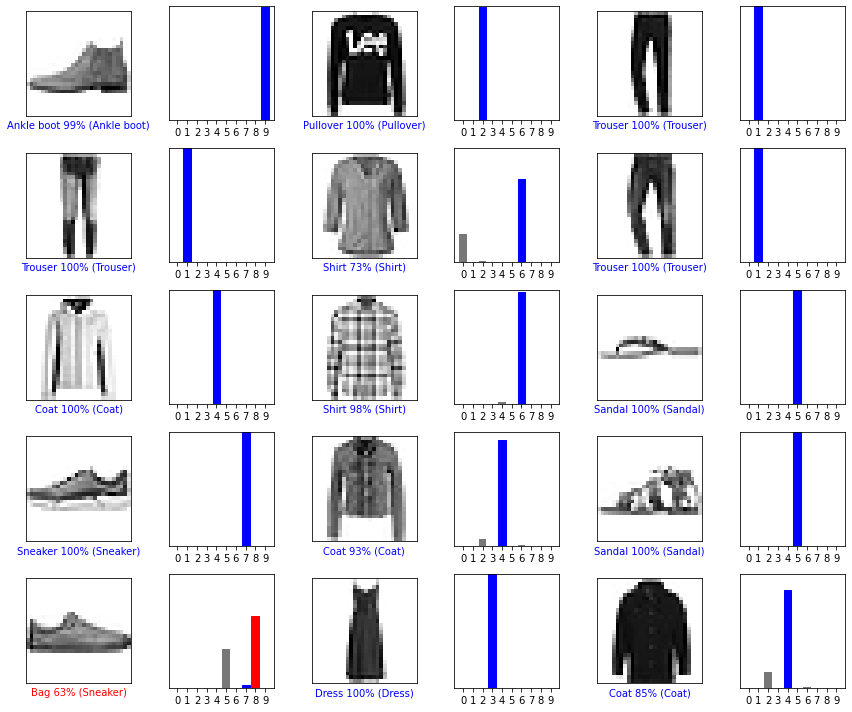

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
